In [3]:
%matplotlib inline 
# plots graphs within the notebook
%config InlineBackend.figure_format='svg' # not sure what this does, may be default images to svg format

from IPython.display import display,Image, Latex
from __future__ import division
from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')

import time

from IPython.display import display,Image, Latex

from IPython.display import clear_output

#import SchemDraw as schem
#import SchemDraw.elements as e

import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.constants as sc

import sympy as sym

from IPython.core.display import HTML
def header(text):
    raw_html = '<h4>' + str(text) + '</h4>'
    return raw_html

def box(text):
    raw_html = '<div style="border:1px dotted black;padding:2em;">'+str(text)+'</div>'
    return HTML(raw_html)

def nobox(text):
    raw_html = '<p>'+str(text)+'</p>'
    return HTML(raw_html)

def addContent(raw_html):
    global htmlContent
    htmlContent += raw_html
    
class PDF(object):
  def __init__(self, pdf, size=(200,200)):
    self.pdf = pdf
    self.size = size

  def _repr_html_(self):
    return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

  def _repr_latex_(self):
    return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    
font = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 12,
        }
fontlabel = {'family' : 'serif',
        #'color'  : 'black',
        'weight' : 'normal',
        'size'   : 16,
        }

from matplotlib.ticker import FormatStrFormatter
plt.rc('font', **font) 

<h1>3D Lid-Driven Cavity</h1>

The second tutorial uses the cad file <a href="https://github.com/yvesdubief/UVM-ME249-CFD/blob/master/CAD/Cube.iges">https://github.com/yvesdubief/UVM-ME249-CFD/blob/master/CAD/Cube.iges</a> to simulate the flow inside a lid-driven cubic cavity of dimensions
<div class='alert alert-danger'>
$$
-\frac{1}{2}\leq x\leq+\frac{1}{2},\;-\frac{1}{2}\leq y\leq+\frac{1}{2},\;-\frac{1}{2}\leq z\leq+\frac{1}{2},\;.
$$
</div>
The flow is incompressible, steady-state and is governed by the following equations:
<div class='alert alert-danger'>
$$
\vec{\nabla}\cdot\vec{u}=0
$$
$$
\partial_t\vec{u}+(\vec{u}\cdot\vec{\nabla})\vec{u}=-\vec{\nabla}p+\nabla^2\vec{u}
$$
and
$$
v(y=-1/2)=Re
$$
</div>
The Reynolds number of the simulation is $Re=1000$.


<p class='alert alert-info'>
Using <a href="http://www.sciencedirect.com/science/article/pii/S0021999105000033">http://www.sciencedirect.com/science/article/pii/S0021999105000033</a>, as a benchmark, set up, simulate, verify and validate this flow.
</p>

<h3>Set up</h3>
<ul>
<li>Create a CAD</li>
<li>Create several meshes(see verification and validation)</li>
<li>Choose the type of flow (incompressible, compressible,...)</li>
<li>Define initial conditions</li>
<li>Define boundary conditions</li>
<li>Choose numerical methods</li>
<li>Define maximum simulation time or maximum number of iterations and number of samples to be saved</li>
<li>Choose the number of processors</li>
</ul>

<h3>Simulation</h3>
<ul>
<li>Monitor convergence</li>
<li>Test different number of processors to determine optimum number of processors to run on</li>
<li>Drink coffee, check email, text friends, set up next simulation, and/or finish python homework</li> 
</ul>

<h3>Verification</h3>
<ul>
<li>Check that maxima and minima of velocity pressure are reasonable</li>
<li>Does the flow behave as predicted near boundaries?</li>
<li>Do flow variables appear to converge with increased mesh resolution?</li>
</ul>

<h3>Validation</h3>
<ul>
<li>If there is an experiment or another simulation to compare with, show that the solution converges toward the benchmark data</li>
<li>If there is no benchmark, perform extensive grid convergence</li>
</ul>

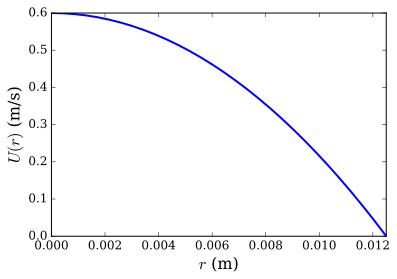

In [6]:
import numpy as np

n = 30
r = np.linspace(0,R,n)

U = 2 * Ub * (1 - np.power(r,2)/R**2)
import matplotlib.pyplot as plt

plt.plot(r,U,linewidth = 2)
plt.xlabel(r"$r$ (m)", fontdict = fontlabel)
plt.ylabel(r"$U(r)$ (m/s)", fontdict = fontlabel)
plt.xlim(0,R)
plt.show()

The wall shear stress is defined:
$$
\tau_w = \mu \frac{dU}{dr}
$$

In [7]:
tauw = - mu * (U[n-1] - U[n-2])/(r[n-1] - r[n-2])
print("wall shear stress = %1.4f Pa" %tauw)

wall shear stress = 0.0012 Pa


In [5]:
mdpdx = 8 * mu *Ub / R**2
tauw_e = R * mdpdx / 2
print("Exact wall shear stress = %1.4f Pa" %tauw_e)

Exact wall shear stress = 0.0012 Pa


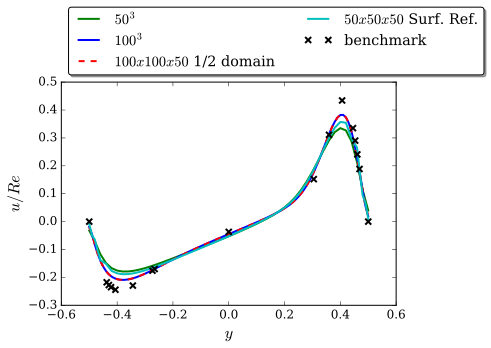

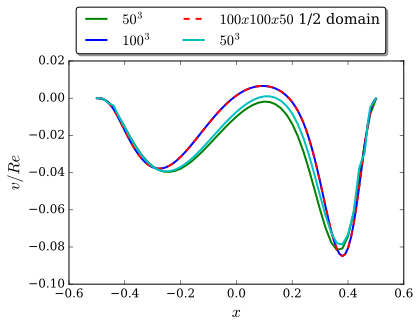

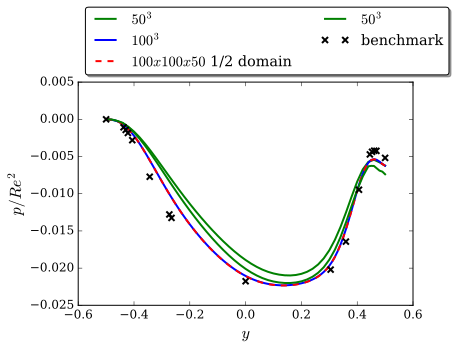

In [41]:
filename = 'Data/3DLidDrivenCube/Benchmark/u_p_0y0Re1000G1trim.csv'
data = np.genfromtxt(filename,delimiter=',',skip_header=0)
y_benchmark = data[:,0]
u_benchmark = data[:,1]
p_benchmark = data[:,2]
filename = 'Data/3DLidDrivenCube/50x50x50/plt0y0.csv'
data = np.genfromtxt(filename,delimiter=',',skip_header=1)
Re = 1000
p_50 = data[:,0]
u_50 = data[:,1]
v_50 = data[:,2]
w_50 = data[:,3]
y_50 = data[:,7]
filename = 'Data/3DLidDrivenCube/50x50x50Surf24/plt0y0.csv'
data = np.genfromtxt(filename,delimiter=',',skip_header=1)
Re = 1000
p_50S24 = data[:,0]
u_50S24 = data[:,1]
v_50S24 = data[:,2]
w_50S24 = data[:,3]
y_50S24 = data[:,7]
filename = 'Data/3DLidDrivenCube/100x100x100/plt0y0.csv'
data = np.genfromtxt(filename,delimiter=',',skip_header=1)
Re = 1000
p_100 = data[:,0]
u_100 = data[:,1]
v_100 = data[:,2]
w_100 = data[:,3]
y_100 = data[:,7]
filename = 'Data/3DLidDrivenCube/100x100x100half/plt0y0.csv'
data = np.genfromtxt(filename,delimiter=',',skip_header=1)
Re = 1000
p_100h = data[:,0]
u_100h = data[:,1]
v_100h = data[:,2]
w_100h = data[:,3]
y_100h = data[:,7]
plt.plot(y_50,u_50/Re,'g-',linewidth = 2,label=r"$50^3$")
plt.plot(y_100,u_100/Re,'b-',linewidth = 2,label=r"$100^3$")
plt.plot(y_100h,u_100h/Re,'r--',linewidth = 2,label=r"$100x100x50$ 1/2 domain")
plt.plot(y_50S24,u_50S24/Re,'c-',linewidth = 2,label=r"$50x50x50$ Surf. Ref.")
plt.plot(y_benchmark,u_benchmark,'kx',mew =2 , label=r"benchmark")
plt.xlabel(r"$y$", fontdict = fontlabel)
plt.ylabel(r"$u/Re$", fontdict = fontlabel)
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=2, shadow=True, fancybox=True)
plt.show()
plt.plot(y_50,v_50/Re,'g-',linewidth = 2,label=r"$50^3$")
plt.plot(y_100,v_100/Re,'b-',linewidth = 2,label=r"$100^3$")
plt.plot(y_100h,v_100h/Re,'r--',linewidth = 2,label=r"$100x100x50$ 1/2 domain")
plt.plot(y_50S24,v_50S24/Re,'c-',linewidth = 2,label=r"$50^3$")
plt.xlabel(r"$x$", fontdict = fontlabel)
plt.ylabel(r"$v/Re$", fontdict = fontlabel)
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=2, shadow=True, fancybox=True)
plt.show()
plt.plot(y_50,(p_50-p_50[0])/Re**2,'g-',linewidth = 2,label=r"$50^3$")
plt.plot(y_100,(p_100-p_100[0])/Re**2,'b-',linewidth = 2,label=r"$100^3$")
plt.plot(y_100h,(p_100h-p_100h[0])/Re**2,'r--',linewidth = 2,label=r"$100x100x50$ 1/2 domain")
plt.plot(y_50S24,(p_50S24-p_50S24[0])/Re**2,'g-',linewidth = 2,label=r"$50^3$")
n = len(p_benchmark)-1
plt.plot(y_benchmark,p_benchmark-p_benchmark[n],'kx',mew =2 , label=r"benchmark")
plt.xlabel(r"$y$", fontdict = fontlabel)
plt.ylabel(r"$p/Re^2$", fontdict = fontlabel)
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=2, shadow=True, fancybox=True)
plt.show()

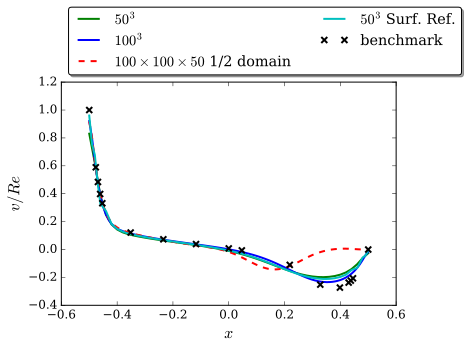

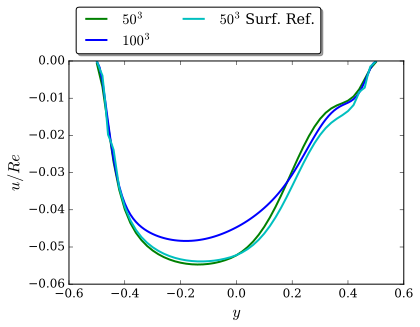

In [47]:
filename = 'Data/3DLidDrivenCube/Benchmark/v_p_x00Re1000G1trim.csv'
data = np.genfromtxt(filename,delimiter=',',skip_header=0)
x_benchmark = data[:,0]
v_benchmark = data[:,1]
p_benchmark = data[:,2]
filename = 'Data/3DLidDrivenCube/50x50x50/pltx00.csv'
data = np.genfromtxt(filename,delimiter=',',skip_header=1)
Re = 1000
p_50 = data[:,0]
u_50 = data[:,1]
v_50 = data[:,2]
w_50 = data[:,3]
x_50 = data[:,6]
filename = 'Data/3DLidDrivenCube/50x50x50Surf24/pltx00.csv'
data = np.genfromtxt(filename,delimiter=',',skip_header=1)
Re = 1000
p_50S24 = data[:,0]
u_50S24 = data[:,1]
v_50S24 = data[:,2]
w_50S24 = data[:,3]
x_50S24 = data[:,6]
filename = 'Data/3DLidDrivenCube/100x100x100/pltx00.csv'
data = np.genfromtxt(filename,delimiter=',',skip_header=1)
Re = 1000
p_100 = data[:,0]
u_100 = data[:,1]
v_100 = data[:,2]
w_100 = data[:,3]
x_100 = data[:,6]
filename = 'Data/3DLidDrivenCube/100x100x100half/pltx00.csv'
data = np.genfromtxt(filename,delimiter=',',skip_header=1)
Re = 1000
p_100h = data[:,0]
u_100h = data[:,1]
v_100h = data[:,2]
w_100h = data[:,3]
x_100h = data[:,6]
plt.plot(x_50,v_50/Re,'g-',linewidth = 2,label=r"$50^3$")
plt.plot(x_100,v_100/Re,'b-',linewidth = 2,label=r"$100^3$")
plt.plot(x_100h,v_100h/Re,'r--',linewidth = 2,label=r"$100\times100\times50$ 1/2 domain")
plt.plot(x_50S24,v_50S24/Re,'c-',linewidth = 2,label=r"$50^3$ Surf. Ref.")
plt.plot(x_benchmark,v_benchmark,'kx',mew =2 , label=r"benchmark")
plt.xlabel(r"$x$", fontdict = fontlabel)
plt.ylabel(r"$v/Re$", fontdict = fontlabel)
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=2, shadow=True, fancybox=True)
plt.show()
plt.plot(x_50,u_50/Re,'g-',linewidth = 2,label=r"$50^3$")
plt.plot(x_100,u_100/Re,'b-',linewidth = 2,label=r"$100^3$")
# plt.plot(x_100h,u_100h/Re,'r--',linewidth = 2,label=r"$100\times100\times50$ 1/2 domain")
plt.plot(x_50S24,u_50S24/Re,'c-',linewidth = 2,label=r"$50^3$ Surf. Ref.")
plt.xlabel(r"$y$", fontdict = fontlabel)
plt.ylabel(r"$u/Re$", fontdict = fontlabel)
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=2, shadow=True, fancybox=True)
plt.show()

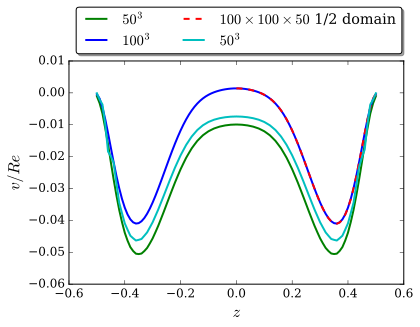

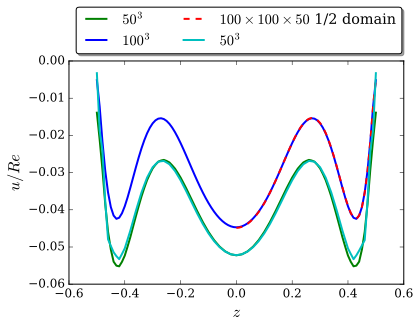

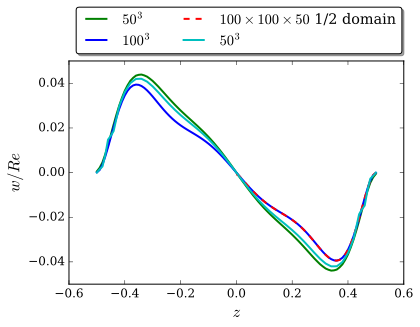

In [46]:
filename = 'Data/3DLidDrivenCube/50x50x50/plt00z.csv'
data = np.genfromtxt(filename,delimiter=',',skip_header=1)
Re = 1000
p_50 = data[:,0]
u_50 = data[:,1]
v_50 = data[:,2]
w_50 = data[:,3]
z_50 = data[:,8]
filename = 'Data/3DLidDrivenCube/50x50x50Surf24/plt00z.csv'
data = np.genfromtxt(filename,delimiter=',',skip_header=1)
Re = 1000
p_50S24 = data[:,0]
u_50S24 = data[:,1]
v_50S24 = data[:,2]
w_50S24 = data[:,3]
z_50S24 = data[:,8]
filename = 'Data/3DLidDrivenCube/100x100x100/plt00z.csv'
data = np.genfromtxt(filename,delimiter=',',skip_header=1)
Re = 1000
p_100 = data[:,0]
u_100 = data[:,1]
v_100 = data[:,2]
w_100 = data[:,3]
z_100 = data[:,8]
filename = 'Data/3DLidDrivenCube/100x100x100half/plt00z.csv'
data = np.genfromtxt(filename,delimiter=',',skip_header=1)
Re = 1000
p_100h = data[:,0]
u_100h = data[:,1]
v_100h = data[:,2]
w_100h = data[:,3]
z_100h = data[:,8]
plt.plot(z_50,v_50/Re,'g-',linewidth = 2,label=r"$50^3$")
plt.plot(z_100,v_100/Re,'b-',linewidth = 2,label=r"$100^3$")
plt.plot(z_100h,v_100h/Re,'r--',linewidth = 2,label=r"$100\times100\times50$ 1/2 domain")
plt.plot(z_50S24,v_50S24/Re,'c-',linewidth = 2,label=r"$50^3$ Surf. Ref.")
plt.xlabel(r"$z$", fontdict = fontlabel)
plt.ylabel(r"$v/Re$", fontdict = fontlabel)
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=2, shadow=True, fancybox=True)
plt.show()
plt.plot(z_50,u_50/Re,'g-',linewidth = 2,label=r"$50^3$")
plt.plot(z_100,u_100/Re,'b-',linewidth = 2,label=r"$100^3$")
plt.plot(z_100h,u_100h/Re,'r--',linewidth = 2,label=r"$100\times100\times50$ 1/2 domain")
plt.plot(z_50S24,u_50S24/Re,'c-',linewidth = 2,label=r"$50^3$ Surf. Ref.")
plt.xlabel(r"$z$", fontdict = fontlabel)
plt.ylabel(r"$u/Re$", fontdict = fontlabel)
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=2, shadow=True, fancybox=True)
plt.show()
plt.plot(z_50,w_50/Re,'g-',linewidth = 2,label=r"$50^3$")
plt.plot(z_100,w_100/Re,'b-',linewidth = 2,label=r"$100^3$")
plt.plot(z_100h,w_100h/Re,'r--',linewidth = 2,label=r"$100\times100\times50$ 1/2 domain")
plt.plot(z_50S24,w_50S24/Re,'c-',linewidth = 2,label=r"$50^3$ Surf. Ref.")
plt.xlabel(r"$z$", fontdict = fontlabel)
plt.ylabel(r"$w/Re$", fontdict = fontlabel)
plt.legend(loc=3, bbox_to_anchor=[0, 1],
           ncol=2, shadow=True, fancybox=True)
plt.show()